# Full Adder
In the following is a quantum circuit acting as a full adder. 

## 1. Import necessary libraries

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

## 2. Create the circuit
2.1 crate a circuit with three qubit and two classical bit

2.2 Apply X-Pauli-Gate (Qbit = |1>) to first and second, depending on the desired number

2.3 Apply Toffoly-Gate with first and second qbit as control and third as target bit

2.4 Apply CNOT with first as control and second as target bit (gates must not be exchanged, because after CNOT q1 ist changed from original input)

2.5 Measure first and second qubit to classical bit

(Optional: add barriers and draw the circuit)

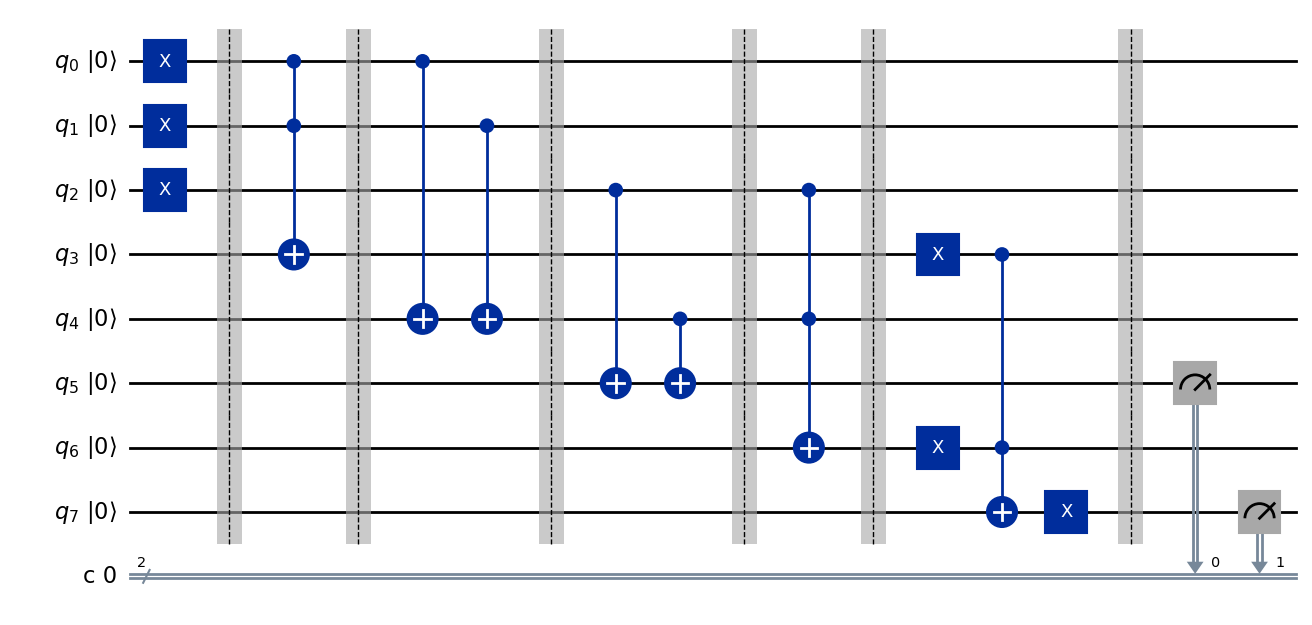

In [5]:
qc = QuantumCircuit(8, 2)
# q0 = A
# q1 = B
# q2 = C
# q3 = AND1(A,B)
# q4 = XOR1(A,B)
# q5 = XOR2(C,q4) = XOR2(C,XOR1) = SUM
# q6 = AND2(C,q4) = AND2(C,XOR1)
# q7 = OR(q3,q6)  = OR(AND1,AND2) = C_out

qc.x(0)     # comment line to set q0 = |0> 
qc.x(1)     # comment line to set q1 = |0>
qc.x(2)     # comment line to set q2 = |0>

qc.barrier()
# AND1(A,B)
qc.ccx(0,1,3)   

qc.barrier()
# XOR1(A,B)
qc.cx(0,4)
qc.cx(1,4)

qc.barrier()
# XOR2(C,q4) = XOR2(C,XOR1) = SUM
qc.cx(2,5)
qc.cx(4,5)

qc.barrier()
# AND2(C,q4) = AND2(C,XOR1)
qc.ccx(2,4,6)

qc.barrier()
# OR(q3,q6)  = OR(AND1,AND2) = C_out
qc.x(3)
qc.x(6)
qc.ccx(3,6,7)
qc.x(7)

qc.barrier()
qc.measure(5, 0)
qc.measure(7, 1)

qc.draw('mpl', initial_state=True)

## 3. Simulate the circuit
3.1 Select the simulator

3.2 Transpile the quantum circuit in elementary gates

3.3 Run the circuit

3.4 Show the results

Results: {'11': 1000}


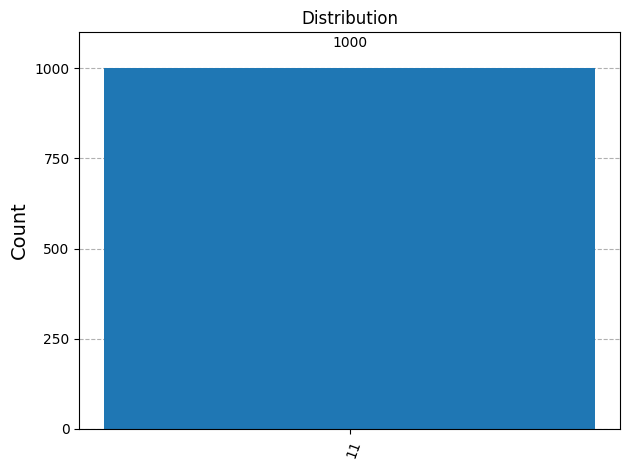

In [6]:
simulator = AerSimulator()

transpile_circuit = transpile(qc, simulator)

result = simulator.run(transpile_circuit, shots=1000).result()

counts = result.get_counts()
print("Results:", counts)
plot_histogram(counts, title="Distribution")